In [1]:
import os, random, matplotlib, pickle, yaml
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob

SMALL_SIZE, MEDIUM_SIZE = 9, 12

In [2]:
result_path = "results/round2_legs_antennae_resnet101"
with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])
    
config_path = "."
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
tot_bp, tot_bp_scaled, tot_bp_rotated, tot_body_orientation, tot_angles, tot_rotations, tot_power, tot_embed = [], [], [], [], [], [], [], []
for file in tqdm(INFO_values):
    tot_bp.append( np.load(f"{file['directory']}/bodypoints.npy") )
    tot_bp_scaled.append( np.load(f"{file['directory']}/scaled_bodypoints.npy") )
    tot_bp_rotated.append( np.load(f"{file['directory']}/rotated_bodypoints.npy") )
    tot_body_orientation.append( np.load(f"{file['directory']}/body_orientation_angles.npy") )
    tot_angles.append( np.load(f"{file['directory']}/angles.npy") )
    tot_power.append( np.load(f"{file['directory']}/power.npy") )
    tot_embed.append( np.load(f"{file['directory']}/embeddings.npy") )
tot_bp = np.concatenate(tot_bp)
tot_bp_scaled = np.concatenate(tot_bp_scaled)
tot_bp_rotated = np.concatenate(tot_bp_rotated)
tot_body_orientation = np.concatenate(tot_body_orientation)
tot_angles = np.concatenate(tot_angles)
tot_power = np.concatenate(tot_power, axis=2)
tot_embed = np.concatenate(tot_embed)

In [4]:
print(f"tot_bp shape: {tot_bp.shape}")
print(f"tot_bp_unrot shape: {tot_bp_scaled.shape}")
print(f"tot_bp_rotated shape: {tot_bp_rotated.shape}")
print(f"tot_angles shape: {tot_angles.shape}")
print(f"tot_power shape: {tot_power.shape}")
print(f"tot_embed shape: {tot_embed.shape}")

tot_bp shape: (1000781, 30, 3)
tot_bp_unrot shape: (1000781, 30, 3)
tot_bp_rotated shape: (1000781, 30, 3)
tot_angles shape: (1000781, 8, 2)
tot_power shape: (8, 21, 1000781)
tot_embed shape: (1000781, 3)


<hr><hr>

In [128]:
from helper import _rotational, angle_calc

test_bp = tot_bp[:10000,:,:2]

test_angles = [
    {'a': 0, 'b': 7, 'c': 6},
    {'a': 1, 'b': 0, 'c': 6},
    {'a': 1, 'b': 7, 'c': 6}
]

test_labels = [
    "{'a': 0, 'b': 7, 'c': 6}",
    "{'a': 1, 'b': 0, 'c': 6}",
    "{'a': 1, 'b': 7, 'c': 6}"
]

In [129]:
angles = angle_calc(test_bp, test_angles)

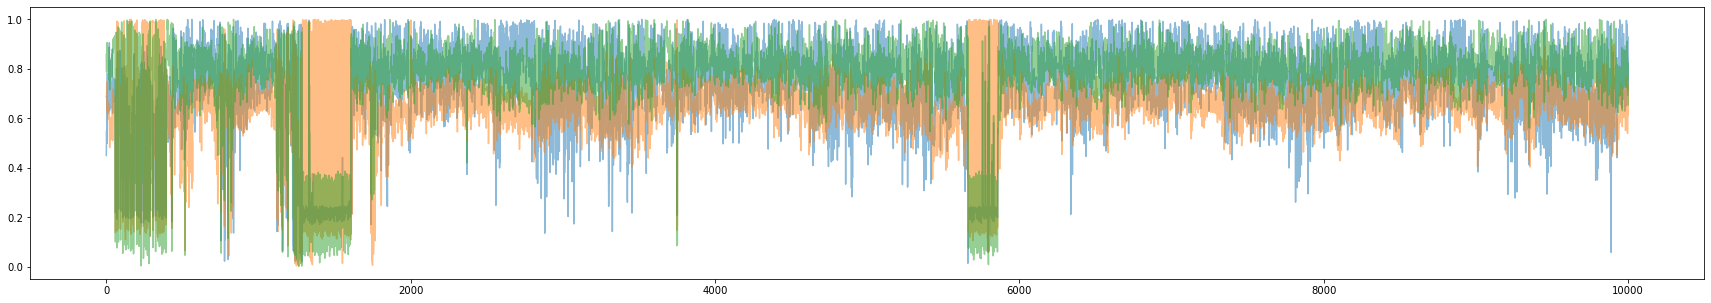

In [130]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(angles, alpha=0.5)
plt.show()

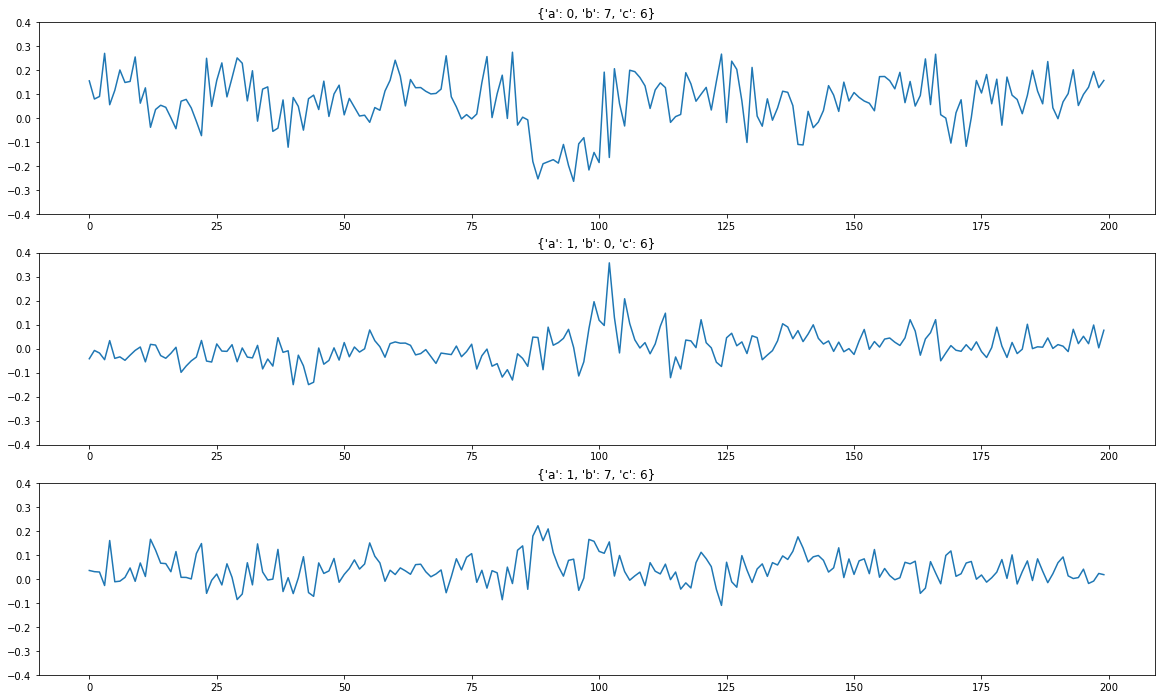

In [131]:
start_idx, stop_idx = 1900, 2100

centered_angles = angles - np.mean(angles, axis=0)

num_angles = angles.shape[1]
fig, ax = plt.subplots(num_angles,1,figsize=(20,4*num_angles))
for i in range(num_angles):
    ax[i].plot(centered_angles[start_idx:stop_idx, i], label=f"angle {i}")
    ax[i].set(title=f"{test_labels[i]}", ylim=[-0.4, 0.4
                                              
                                              ])
plt.show()

In [132]:
np.var(centered_angles[:, :], axis=0)

array([0.03399566, 0.01878193, 0.02868052])

In [162]:
test_bp_rotated = tot_bp_rotated[:50000,:,:]

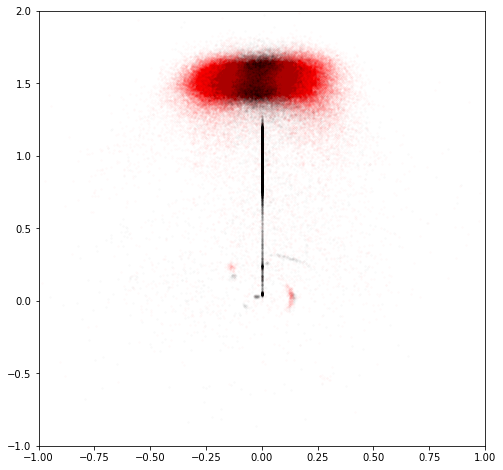

In [163]:
idx_0 = test_bp_rotated[:,0,2]>0.99
idx_1 = test_bp_rotated[:,1,2]>0.99
idx_7 = test_bp_rotated[:,7,2]>0.99
idx_20 = test_bp_rotated[:,20,2]>0.99


fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(test_bp_rotated[idx_0,0,0], test_bp_rotated[idx_0,0,1], alpha=0.01, s=3, c='k')
plt.scatter(test_bp_rotated[idx_1,1,0], test_bp_rotated[idx_1,1,1], alpha=0.01, s=3, c='k')
plt.scatter(test_bp_rotated[idx_7,7,0], test_bp_rotated[idx_7,7,1], alpha=0.01, s=3, c='r')
plt.scatter(test_bp_rotated[idx_20,20,0], test_bp_rotated[idx_20,20,1], alpha=0.01, s=3, c='r')
plt.xlim(-1,1); plt.ylim(-1,2)
plt.show()

In [149]:
test_bp_rotated.shape

(1000781,)